sklearn.metrics 는 scikit-learn 패키지 중 모델 평가에 사용되는 모듈.

classification_report는 주요 분류 측정 항목을 보여주는 보고서 모듈

confusion_matrix는 분류의 정확성을 평가하기 위한 오차행렬 계산 모듈

sklearn.model_selection는 scikit-learn패키지 중 클래스를 나눌 때, 그리고 함수를 통해 train/test셋을 나눌 때, 아울러 모델 검증에 사용되는 서브 패키지이다

train_test_split은 배열 또는 행렬을 임의의 훈련 및 테스트 셋으로 분할하는 모듈이다.

sklearn.tree는 분류 및 회귀를 위한 의사결정 트리 기반 모델이있는 서브 패키지

DecisionTreeClassifier는 의사결정 트리 분류 모듈

Iphython.display는 Ipython 내에 정보를 보여주는 도구용도의 공용 API이다.

Image는 raw데이터가 있는 png나 jpeg등의 이미지 객체를 만드는 모듈

pandas는 데이터를 구조화된 형식으로 가공 및 분석할 수 있도록 자료구조를 제공하는 패키지

numpy는 고성능 계산이나 데이터분석에 유용한 패키지

pydotplus는 그래프를 생성하는  graphviz의 dot언어를 파이썬 인터페이스에 제공하는 모듈

os는 운영체제와 상호작용하기 위한 기본적인 기능(경로생성, 변경 등) 이 제공되믄 모듈


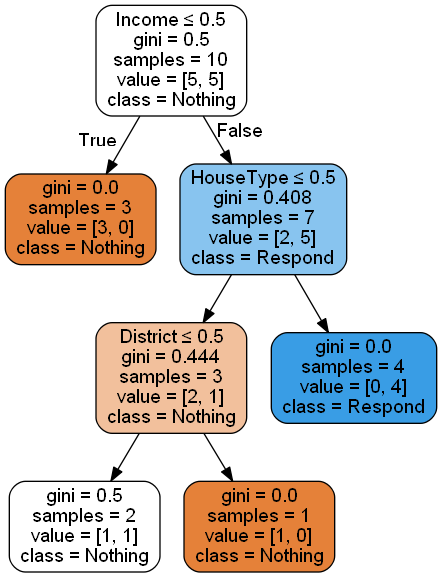

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os
#데이터 정의
data = pd.DataFrame({ 'District' : ['Suburban','Suburban','Rural','Urban','Rural','Urban','Suburban','Rural','Urban','Suburban','Rural','Urban','Suburban','Urban'],
                      'HouseType' : ['Detached','Semi-detached','Semi-detached','Detached','Semi-detached','Semi-detached','Detached','Detached','Detached','Semi-detached','Semi-detached','Detached','Detached','Semi-detached'],
                      'Income' : ['High','High','Low','Low','High','High','Low','Low','High','High','Low','Low','High','High'],
                      'PreviousCustomer' : ['No','Yes','No','Yes','No','No','Yes','Yes','Yes','Yes','No','No','No','Yes'],
                      'Outcome' : ['Nothing','Respond','Respond','Nothing','Respond','Respond','Respond','Nothing','Nothing','Respond','Nothing','Nothing','Respond','Respond']},
                       columns=["District","HouseType","Income","PreviousCustomer","Outcome"])
data

#데이터 전처리
#data set의 각 칼럼의 값을 String 에서 int 타입으로 replace 해주는 것 ! 
data.District = data.District.replace('Suburban',0)
data.District = data.District.replace('Urban',1)
data.District = data.District.replace('Rural',2)

data.HouseType = data.HouseType.replace('Detached',0)
data.HouseType = data.HouseType.replace('Semi-detached',1)

data.Income = data.Income.replace('Low',0)
data.Income = data.Income.replace('High',1)

data.PreviousCustomer = data.PreviousCustomer.replace('No',0)
data.PreviousCustomer = data.PreviousCustomer.replace('Yes',1)

data.Outcome = data.Outcome.replace('Nothing',0)
data.Outcome = data.Outcome.replace('Respond',1)


#속성과 클래스 분리
x = np.array(pd.DataFrame(data,columns=['District','HouseType','Income','PreviousCustomer']))


y = np.array(pd.DataFrame(data,columns=['Outcome']))

x_train, x_test, y_train, y_test = train_test_split(x,y)

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
dt_prediction = dt_clf.predict(x_test)
#IPython 내에서 그래프를 표현하는 소프트웨어 설치과정
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Nothing', 'Respond'])
# dt_clf - 의사결정 트리 분류기
# out_file - None일 경우 문자열료 반환
# filled는 True일 경우 분류를 위한 노드를 색칠하는 것
# rounded는 True일 경우 둥근 모서리
# special_characters는 True일 경우 특수 문자 표시
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                 feature_names = feature_names,
                                 class_names = target_name,
                                 filled = True, rounded = True,
                                 special_characters = True)
#graph_from_dot_data() - dot형식의 데이터로 정의된 그래프를 로드하는 함수
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())


In [20]:
import pandas as pd
import numpy as np
from pprint import pprint

#데이터 정의
data = pd.DataFrame({ 'District' : ['Suburban','Suburban','Rural','Urban','Rural','Urban','Suburban','Rural','Urban','Suburban','Rural','Urban','Suburban','Urban'],
                      'House Type' : ['Detached','Semi-detached','Semi-detached','Detached','Semi-detached','Semi-detached','Detached','Detached','Detached','Semi-detached','Semi-detached','Detached','Detached','Semi-detached'],
                      'Income' : ['High','High','Low','Low','High','High','Low','Low','High','High','Low','Low','High','High'],
                      'Previous Customer' : ['No','Yes','No','Yes','No','No','Yes','Yes','Yes','Yes','No','No','No','Yes'],
                      'Outcome' : ['Nothing','Respond','Respond','Nothing','Respond','Respond','Respond','Nothing','Nothing','Respond','Nothing','Nothing','Respond','Respond']},
                       columns=["District","House Type","Income","Previous Customer","Outcome"])

#기술속성(descriptive features)
features= data[["District","House Type","Income",'Previous Customer']]

#대상 속성(target feature)
target = data["Outcome"]

print(data)

#엔트로피 계산 함수 - 불순도를 측정하는 것 ( 불순도는 낮을수록 좋고,불순도 증가시 엔트로피도 증가 )
def entropy(target_col):
    # elements : target_col에서 중복된 부분을 제거하고 넣는 것 , counts : 각각의 개수
    elements, counts = np.unique(target_col,return_counts = True)
    #entropy 식을 대입하는 부분
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
print('H(x)= ',round(entropy(target),5))

#InfoGain 계산 함수 ( 분할 전과 분할 후의 엔트로피를 계산한 것 높을수록 좋음)
def InfoGain(data,split_attribute_name,target_name):
    
    #전체 엔트로피 계산
    total_entropy = entropy(data[target_name])
    print('Entropy(D)= ', round(total_entropy,5))
    
    #가중 엔트로피 계산
    # vals : data[split_attribute_name] 에서 중복된 부분을 제거하고 넣는 것 , counts : 각각의 개수
    vals, counts= np.unique(data[split_attribute_name],return_counts=True)
    #전체 counts에서 해당 비율을 곱함으로써 가중치를 주고 결측치 제거.
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                              entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                              for i in range(len(vals))])
    print('H(',split_attribute_name, ')=',round(Weighted_Entropy,5))
       
    #InfoGain 계산 부분
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
#House Type의 엔트로피가 가장 낮으므로 tree의 젤 위에 House Type이 오게되는 것 !
print('InfoGain( District ) = ', round(InfoGain(data, "District", "Outcome"), 5), '\n')
print('InfoGain( House Type ) = ', round(InfoGain(data, "House Type", "Outcome"), 5), '\n')
print('InfoGain( Income ) = ', round(InfoGain(data, "Income", "Outcome"), 5),'\n')
print('InfoGain( Previous Customer ) = ', round(InfoGain(data, "Previous Customer", "Outcome"), 5))
print("\n")

# ID3 알고리즘
def ID3(data,originaldata,features,target_attribute_name,parent_node_class = None):
 
    # 중지기준 정의
 
    # 1. 대상 속성이 단일값을 가지면: 해당 대상 속성 반환
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
 
    # 2. 데이터가 없을 때: 원본 데이터에서 최대값을 가지는 대상 속성 반환
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])\
               [np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
 
    # 3. 기술 속성이 없을 때: 부모 노드의 대상 속성 반환
    elif len(features) ==0:
        return parent_node_class
 
    # 트리 성장
    else:
        # 부모노드의 대상 속성 정의
        parent_node_class = np.unique(data[target_attribute_name])\
                            [np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        
        # 데이터를 분할할 속성 선택
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # 트리 구조 생성
        tree = {best_feature:{}}
        
        # 최대 정보이득을 보인 기술 속성 제외
        features = [i for i in features if i != best_feature]
        
        # 가지 성장
        for value in np.unique(data[best_feature]):
            # 데이터 분할. dropna(): 결측값을 가진 행, 열 제거
            sub_data = data.where(data[best_feature] == value).dropna()
            
            # ID3 알고리즘
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)

tree = ID3(data, data, ["District","House Type","Income","Previous Customer"], "Outcome")

pprint(tree)

#House Type 이 Detached, Semi-detached 일 때 각각 tree로 내려가게 된 것임.



    District     House Type Income Previous Customer  Outcome
0   Suburban       Detached   High                No  Nothing
1   Suburban  Semi-detached   High               Yes  Respond
2      Rural  Semi-detached    Low                No  Respond
3      Urban       Detached    Low               Yes  Nothing
4      Rural  Semi-detached   High                No  Respond
5      Urban  Semi-detached   High                No  Respond
6   Suburban       Detached    Low               Yes  Respond
7      Rural       Detached    Low               Yes  Nothing
8      Urban       Detached   High               Yes  Nothing
9   Suburban  Semi-detached   High               Yes  Respond
10     Rural  Semi-detached    Low                No  Nothing
11     Urban       Detached    Low                No  Nothing
12  Suburban       Detached   High                No  Respond
13     Urban  Semi-detached   High               Yes  Respond
H(x)=  0.98523
Entropy(D)=  0.98523
H( District )= 0.89031
InfoGain( D

In [56]:
import pandas as pd
import numpy as np
from math import sqrt
#데이터 선언
data = pd.DataFrame({'HEIGHT(cm)' : [158,158,158,160,160,163,163,160,163,165,165,165,168,168,168,170,170,170],
                    'WEIGHT(kg)' : [58,59,63,59,60,60,61,64,64,61,62,65,62,63,66,63,64,68],
                    'T SHIRT SIZE' : ['M','M','M','M','M','M','M','L','L','L','L','L','L','L','L','L','L','L']},
                   columns=['HEIGHT(cm)','WEIGHT(kg)','T SHIRT SIZE'])

print(data)
#DataFrame형식의 data를 list형태로 변환시킴
data1 = data.values.tolist()

#calculate the Euclidean distance between two vectors
#row = [x,y,type]

def min_max_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    return normalized
"""
for x in range(len(data['HEIGHT(cm)'])):
    df_data[x] = min_max_normalize(data[x])
df_data.describe()
"""

def euclidean_distance(row1,row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) **2
    return sqrt(distance)
#Input the new data
row0 = [165.3,66]
#euclidean_distance 를 확인하는 부분
print("\ntest the distance: ")
for row in data1:
    distance = euclidean_distance(row0,row)
    print(distance)

#Locate the most similar neighbors
def get_neighbors(train,test_row,num_neighbors):
    #빈 list 생성
    distances = list()
    #for 문을 돌면서 distance를 기존 데이터에 append 시키는 부분
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row,dist))
    #append 한 것을 오름차순으로 sort시키는 것
    distances.sort(key=lambda tup: tup[1])
    neighbors=list()
    #빈 list를 만들고 정해진 k값 만큼 for문을 돌면서  거리가 가까운 data를 출력시킴
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
#k를 4로 할 때, 가까운 4개의 data value를 출력하는 부분
neighbors = get_neighbors(data1,row0,4)
print("\ntest the neighbors: ")
for neighbor in neighbors:
    print(neighbor)
#Make a classification prediction with neighbors    
def predict_classification(train,test_row,num_neighbors):
    neighbors = get_neighbors(train,test_row,num_neighbors)
    for neighbor in neighbors:
        print(neighbor)
    #output_values 에 row[-1] = T SHIRT SIZE 이므로 가장 많이 나온 값을 출력하게 하는 부분임
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values),key=output_values.count)
    return prediction

#최종 예측한 것을 보여주는 부분.
print("\nFinal output: ")
prediction = predict_classification(data1,row0,6)

print('Expected (%f,%f), God %s.' %(row0[0],row0[-1],prediction))


    HEIGHT(cm)  WEIGHT(kg) T SHIRT SIZE
0          158          58            M
1          158          59            M
2          158          63            M
3          160          59            M
4          160          60            M
5          163          60            M
6          163          61            M
7          160          64            L
8          163          64            L
9          165          61            L
10         165          62            L
11         165          65            L
12         168          62            L
13         168          63            L
14         168          66            L
15         170          63            L
16         170          64            L
17         170          68            L

test the distance: 
10.830050784737814
10.11385188738693
7.892401408950267
8.780091115700344
8.00562302385018
6.425729530566942
5.50363516232681
5.664803615307429
3.0479501308256425
5.008991914547278
4.011234224026317
1.0440306508910582
4.

In [69]:
data = pd.DataFrame({'HEIGHT(cm)' : [158,158,158,160,160,163,163,160,163,165,165,165,168,168,168,170,170,170],
                    'WEIGHT(kg)' : [58,59,63,59,60,60,61,64,64,61,62,65,62,63,66,63,64,68],
                    'T SHIRT SIZE' : ['M','M','M','M','M','M','M','L','L','L','L','L','L','L','L','L','L','L']},
                   columns=['HEIGHT(cm)','WEIGHT(kg)','T SHIRT SIZE'])

print(data)


from sklearn.model_selection import train_test_split

x=data.iloc[:,:-1].values
y=data.iloc[:,2].values

x_train,x_test,y_train,y_test = train_test_split(x,y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

    HEIGHT(cm)  WEIGHT(kg) T SHIRT SIZE
0          158          58            M
1          158          59            M
2          158          63            M
3          160          59            M
4          160          60            M
5          163          60            M
6          163          61            M
7          160          64            L
8          163          64            L
9          165          61            L
10         165          62            L
11         165          65            L
12         168          62            L
13         168          63            L
14         168          66            L
15         170          63            L
16         170          64            L
17         170          68            L
[[2 0]
 [1 2]]
              precision    recall  f1-score   support

           L       0.67      1.00      0.80         2
           M       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macr